<a href="https://colab.research.google.com/github/keerthana-narra/global-terrorism/blob/main/N_Sai_Keerthana_Reddy_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#CODE

### Importing libraries, mounting drive, reading data set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Capstone project/Copy of Global Terrorism Data.csv',encoding='latin1'
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Taking subset of data by ignoring columns which dosent seem to be useful



In [ ]:
#taking a subset because by looking at the data many columns have null values so not useful
global_terrorism = df[['eventid','iyear',	'imonth',	'iday', 'extended',	'country', 'country_txt',	
                       'region',	'region_txt',	'provstate',	'city',	'latitude',	'longitude', 'success',	
                       'suicide',	'attacktype1',	'attacktype1_txt', 'targtype1',	'targtype1_txt', 
                       'targsubtype1','targsubtype1_txt', 'gname','weaptype1', 'weaptype1_txt', 'nkill', 
                       'nwound',   'ishostkid', 'target1',  'ransom']]

In [ ]:
global_terrorism.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,gname,weaptype1,weaptype1_txt,nkill,nwound,ishostkid,target1,ransom
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Unknown,1.0,0.0,0.0,Julio Guzman,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,Unknown,0.0,0.0,1.0,"Nadine Chaval, daughter",1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Unknown,1.0,0.0,0.0,Employee,0.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Explosives,NaN,NaN,0.0,U.S. Embassy,0.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,Incendiary,NaN,NaN,0.0,U.S. Consulate,0.0


###Re-naming columns

In [ ]:
#renaming the columns by the appropriate name
global_terrorism.rename(columns={'iyear' : 'year' , 'imonth' : 'month', 'iday' : 'day' , 'country_txt' : 'country_name' , 
                                 'region_txt' : 'region_name' ,  'attacktype1_txt' : 'attacktype' , 'target1' : 'target' , 
                                 'nkill' : 'killed' , 'nwound' : 'wounded'  , 'gname' : 'group' , 'targtype1_txt' : 'target_type' , 
                                 'weaptype1_txt' : 'weapon_type' , 'motive' : 'motive' } , inplace = True)
#Introducing new column
global_terrorism['casualities'] = global_terrorism.killed + global_terrorism.wounded
# taking data frame subset into global_terrorism variable
global_terrorism=global_terrorism[[ 'year' , 'month' , 'day' , 'country', 'country_name' ,'region','region_name' , 'city' ,
                                   'latitude' , 'longitude' ,  'attacktype' , 'killed' , 'wounded' , 'casualities' , 'target' , 
                                   'group' , 'target_type' , 'weapon_type' ]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# total no.of years terrorist attacks recorded
print('no.of years terrorist attacks recorded:',global_terrorism.index.nunique())
# total no.of people got killed
print('no.of people got killed:',int(global_terrorism.killed.sum()))
# total no.of people wounded
print('no.of people wounded',int(global_terrorism.wounded.sum()))

no.of years terrorist attacks recorded: 181691
no.of people got killed: 411868
no.of people wounded 523869


In [ ]:
global_terrorism.shape

(181691, 18)

In [ ]:
global_terrorism.columns

Index(['year', 'month', 'day', 'country', 'country_name', 'region',
       'region_name', 'city', 'latitude', 'longitude', 'attacktype', 'killed',
       'wounded', 'casualities', 'target', 'group', 'target_type',
       'weapon_type'],
      dtype='object')

### Visualizing data - plots on year-wise, country-wise, region-wise data and group-wise



1) Visualizing no.of terrorist activities happend from 1970-2017 (Year-wise)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


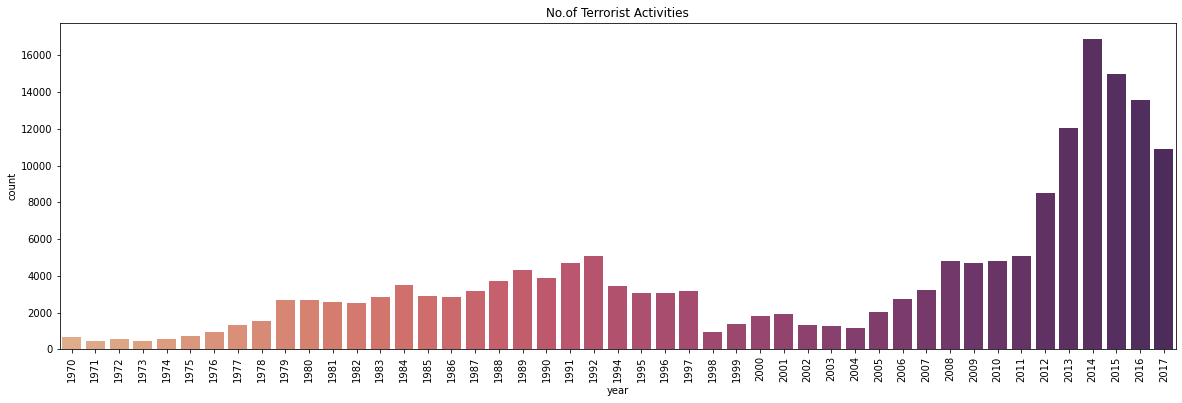

In [ ]:

plt.subplots(figsize=(20,6))   # for size of the rectangle the plot should appear length,breadth
sns.countplot('year',data=global_terrorism,palette='flare') 
plt.xticks(rotation=90) # rotates the year value
plt.title('No.of Terrorist Activities') # title
plt.show()


In this graph it can be observed that intitally the attacks are less and there is a pattern of increasing of terrorist attacks after 2005 and it reached the highest number of attacks recorded in 2014. After that there is slightly declining nature of attacks.

In [ ]:
global_terrorism.group.value_counts()[1:11].reset_index()


,index,group
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


Here there are top 10 groups. Taliban group had recorded the highest no.of terror attacks.

2) Visualizing Top 10 countries in total no.of attacks (Country-wise)


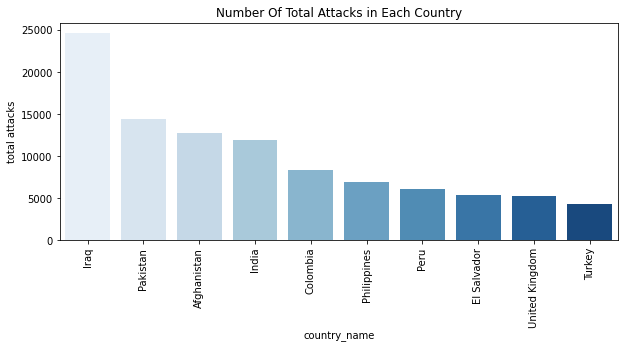

In [ ]:
plt.subplots(figsize=(10,4))   # for size of the rectangle the plot should appear length,breadth
country_attacks = global_terrorism.country_name.value_counts()[:10].reset_index() # counting attacks and slicing upto first 10

country_attacks.columns = ['country_name', 'total attacks'] # names of x and y axis
sns.barplot(x=country_attacks.country_name, y=country_attacks['total attacks'], palette= 'Blues')

plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Country')
plt.show()


Iraq is the highly attacked country and India is on top4 in facing terror attacks. Despite Iraq being a small country it has 14% of total terror attacks which can be considered to be very high.

3) Visualizing attacks in regions (region-wise)


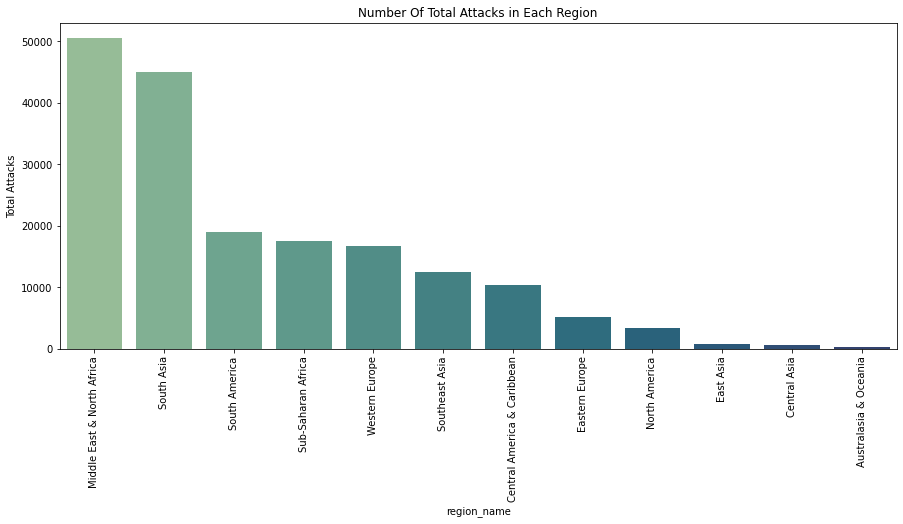

In [ ]:
#Visualizing attacks in regions (region-wise)
region_attacks = global_terrorism.region_name.value_counts().to_frame().reset_index()
region_attacks.columns = ['region_name', 'Total Attacks']

plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.region_name, y=region_attacks['Total Attacks'], palette='crest')
plt.xticks(rotation=90)

plt.title('Number Of Total Attacks in Each Region')
plt.show()

In the Middle East and North Africa there are very high number of terror attacks. This single part takes nearly 28% of the total world terrorism attacks.

4) Terror attacks done by different groups.

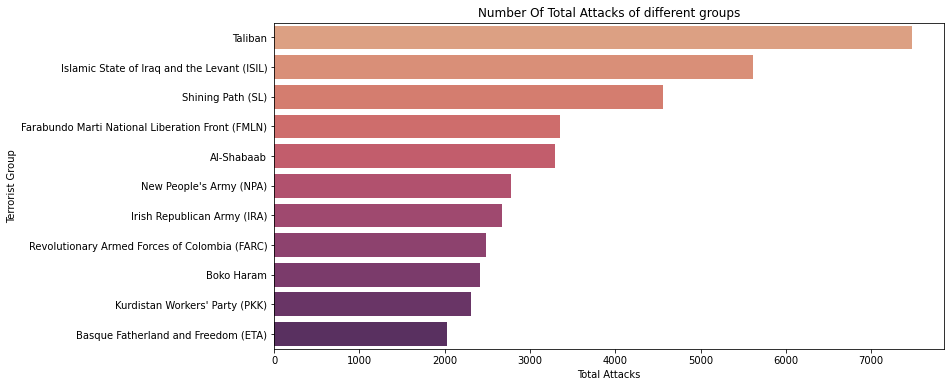

In [ ]:
# taking a subset of attacks based on terrorist groups
group_attacks = global_terrorism.group.value_counts().to_frame().drop('Unknown').reset_index()[:11]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']

# plotting bar graph 
plt.subplots(figsize=(12,6))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='flare')

#plt.xticks(rotation=90)
plt.title('Number Of Total Attacks of different groups')
plt.show()

# Note : There are some unknown group attacks.

Talibans and ISIL groups are highly active and are causing major portion of terror attacks

5) Visualizing no.of attacks done by attack-type

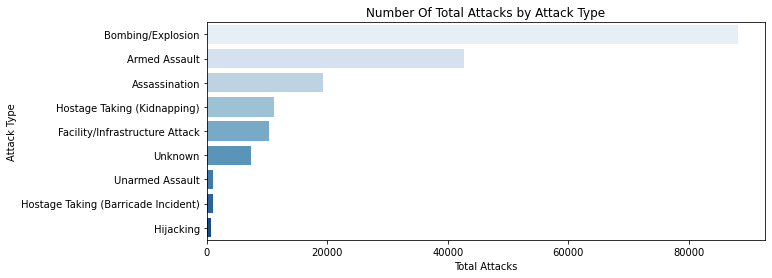

In [ ]:
# Visualizing no.of attacks done by attack-type
attack_type = global_terrorism.attacktype.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(10,4))
sns.barplot(y=attack_type['Attack Type'], x=attack_type['Total Attacks'], palette='Blues')
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

48% of attacks are Bombing/Explosion. It is the attack type choosen mostly by the terror groups as it kills more number of people in single shot. This type of attack creates huge impact in that region and rembered for more time. It damages that place and creates insecure feeling for the people to live in such places further. 

### Analysis of 2014 - most terrorist attacks recorded

In [ ]:
# Setting index value to year
in_2014 = global_terrorism.set_index('year')
in_2014 = in_2014.loc[2014]

In [ ]:
in_2014.group

year
2014    National Liberation Army of Colombia (ELN)
2014                                    Al-Shabaab
2014                                 Jaish-e-Islam
2014                                       Unknown
2014                                    Al-Shabaab
                           ...                    
2014                                       Unknown
2014               Mujahidin Indonesia Timur (MIT)
2014                                       Taliban
2014    Bangsamoro Islamic Freedom Movement (BIFM)
2014                                       Unknown
Name: group, Length: 16903, dtype: object

In [ ]:
x = in_2014.group.value_counts().to_frame().head(15)
x

,group
Unknown,8813
Islamic State of Iraq and the Levant (ISIL),1249
Taliban,1035
Al-Shabaab,871
Boko Haram,495
Donetsk People's Republic,331
Al-Qaida in the Arabian Peninsula (AQAP),291
New People's Army (NPA),289
Maoists,252
Tehrik-i-Taliban Pakistan (TTP),167


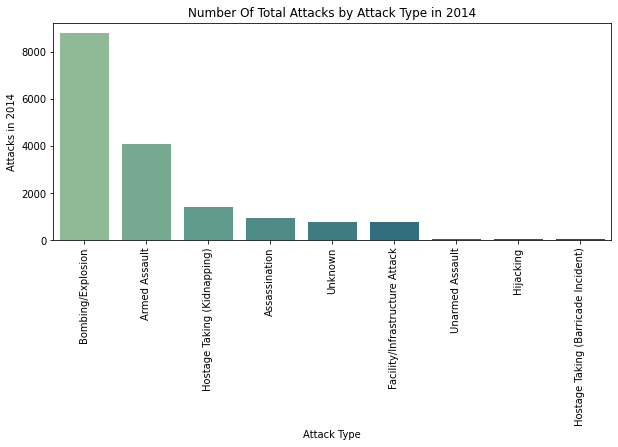

In [ ]:
# Attacks in 2014 by attack type
attacks_in_2014 = in_2014.attacktype.value_counts().to_frame().reset_index()
attacks_in_2014.columns = ['Attack Type', 'Attacks in 2014']
plt.subplots(figsize=(10,4))
sns.barplot(x=attacks_in_2014['Attack Type'], y=attacks_in_2014['Attacks in 2014'], palette='crest')
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type in 2014')
plt.show()

In [ ]:
attacks_in_2014

,Attack Type,Attacks in 2014
0,Bombing/Explosion,8799
1,Armed Assault,4071
2,Hostage Taking (Kidnapping),1397
3,Assassination,920
4,Unknown,784
5,Facility/Infrastructure Attack,783
6,Unarmed Assault,54
7,Hijacking,49
8,Hostage Taking (Barricade Incident),46


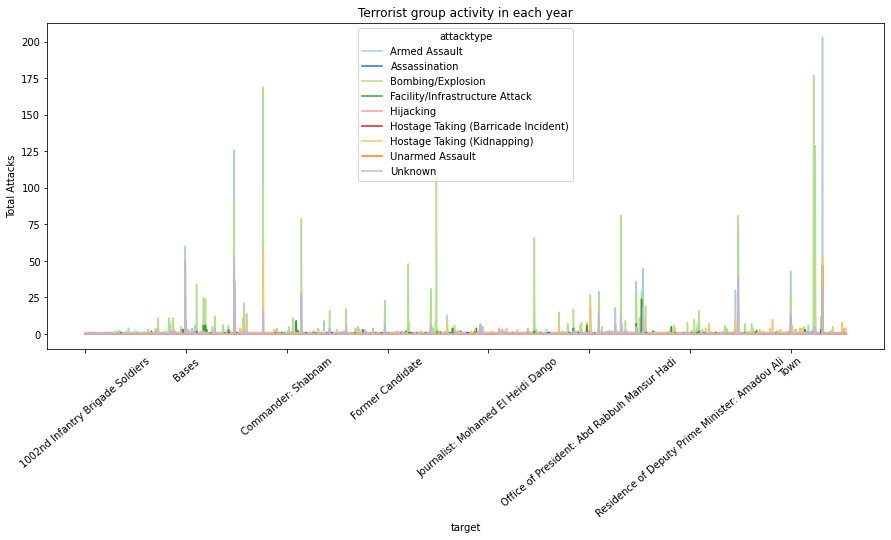

In [ ]:
top_groups_attacking_2014 = in_2014[in_2014.group.isin(in_2014.group.value_counts()[1:20].index)].reset_index()
pd.crosstab(top_groups_attacking_2014.target, top_groups_attacking_2014.attacktype).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.xticks(rotation = 40)
plt.ylabel('Total Attacks')
plt.title('Terrorist group activity in each year')
plt.show()


### Terrorist activity in each year

Armed Assaults, Bombing attack types has high number of total attacks when they terrorist group having target. In general terriorist group use bombing/explosion as their go to option.

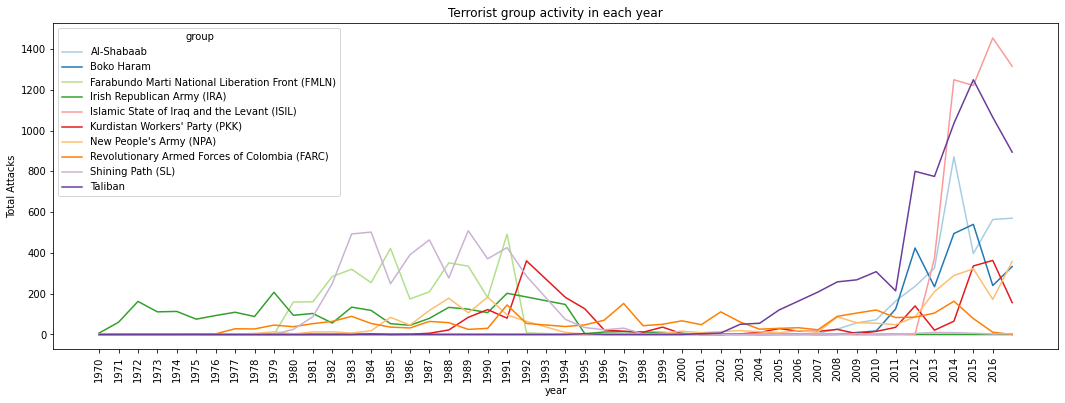

In [ ]:
top_groups_attacking = global_terrorism[global_terrorism.group.isin(global_terrorism.group.value_counts()[1:11].index)]
pd.crosstab(top_groups_attacking.year, top_groups_attacking.group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 1))
plt.xticks(rotation = 90)
plt.ylabel('Total Attacks') 
plt.title('Terrorist group activity in each year')
plt.show()


the data can be seen in two parts ie, before 1995 and after 1995.
Before 1995 there were two main groups attacking. SL and FMLN groups upto 1995 after that they became inactive. There was comparatively low number of attacks from 1995 to 2005. After 2005 Taliban and ISIL group became very active and shown most number of attacks. The reason behind the sudden peak strike might be industrial growth and explodes avaliability for these groups. 
After 1996 SL, FMLN, IRA groups became inactive and recorded no cases for more than 10 years now.



### Terrorism in INDIA


In [ ]:
attacks_in_india = global_terrorism[global_terrorism.country_name=='India'].reset_index()
attacks_in_india.tail()


,index,year,month,day,country,country_name,region,region_name,city,latitude,longitude,attacktype,killed,wounded,casualities,target,group,target_type,weapon_type
11955,181663,2017,12,30,92,India,6,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,0.0,0.0,0.0,Koothuparamba Police Station,Unknown,Police,Explosives
11956,181665,2017,12,30,92,India,6,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,0.0,0.0,0.0,Road Construction Site,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms
11957,181672,2017,12,31,92,India,6,South Asia,Lethapora,33.966527,74.964225,Armed Assault,8.0,3.0,11.0,Camp,Jaish-e-Mohammad (JeM),Police,Explosives
11958,181684,2017,12,31,92,India,6,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0.0,0.0,0.0,Personal Security Officer of Council Member Ih...,Zeliangrong United Front,Government (General),Firearms
11959,181689,2017,12,31,92,India,6,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives


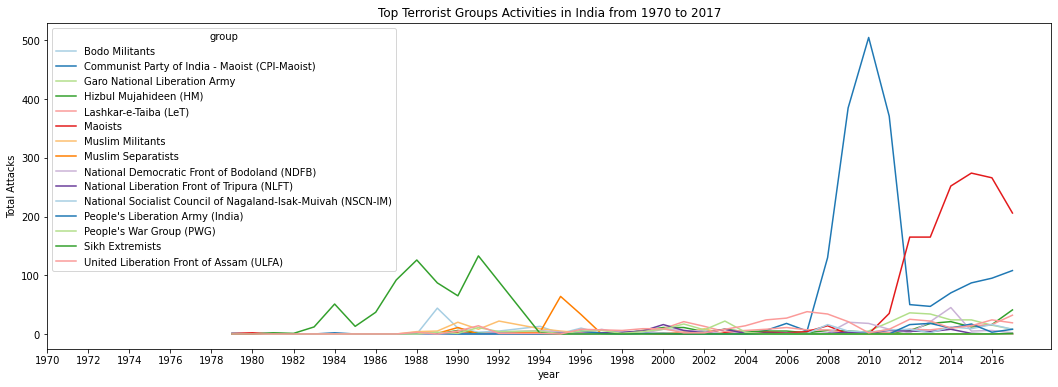

In [ ]:
attack_groups_in_india = attacks_in_india[attacks_in_india.group.isin(attacks_in_india.group.value_counts()[1:16].index)]
pd.crosstab(attack_groups_in_india.year, attack_groups_in_india.group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2018, 2))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in India from 1970 to 2017')
plt.show()


In india CPI-Maoist is the group with highest number of terror attacks. This group is inactive upto 2007 and recorded the highest in 2010. Which is the highest number of attacks india faced till date. Maoists, another group is also very active when compared to other groups. 
